# Building a population model: data



## Human population through time



World population development according to the American Museum of Natural
History: Human Population through time (2023): [video](https://youtu.be/vJ5p3pZlBi4?si=Ou8Lg0apmi4LUvu9)



Here, I extracted approximate data from the video, stored them in a list and printed them as a list comprehension:

In [1]:
# Human population as a list with event, time, number (mio)
population = [["Roman Empire", 1, 170],
              ["Silk Road", 200, 180],
              ["Golden Age of India", 300, 180],
              ["Peak of Mayan Civilization", 500, 177],
              ["Birth of Islam", 600, 178],
              ["Smallpox in Japan", 700, 194],
              ["Gunpowder invented", 800, 214],
              ["Navigational compass", 1000, 277],
              ["Mongol Empire", 1200, 359],
              ["Bubonic Plague", 1300, 370],
              ["Europeans arrive", 1500, 399],
              ["Transatlantic Slave Trade", 1550, 436],
              ["Industrial Revolution", 1750, 759],
              ["World Wars", 1900, 1900],
              ["Current time", 2023, 8000]]
# print data as list comprehension (one per line)
[print(i) for i in population];

['Roman Empire', 1, 170]
['Silk Road', 200, 180]
['Golden Age of India', 300, 180]
['Peak of Mayan Civilization', 500, 177]
['Birth of Islam', 600, 178]
['Smallpox in Japan', 700, 194]
['Gunpowder invented', 800, 214]
['Navigational compass', 1000, 277]
['Mongol Empire', 1200, 359]
['Bubonic Plague', 1300, 370]
['Europeans arrive', 1500, 399]
['Transatlantic Slave Trade', 1550, 436]
['Industrial Revolution', 1750, 759]
['World Wars', 1900, 1900]
['Current time', 2023, 8000]


## Visualizing the data:



Here is a visualization of these data with the population over time, annotated by the events from the video.

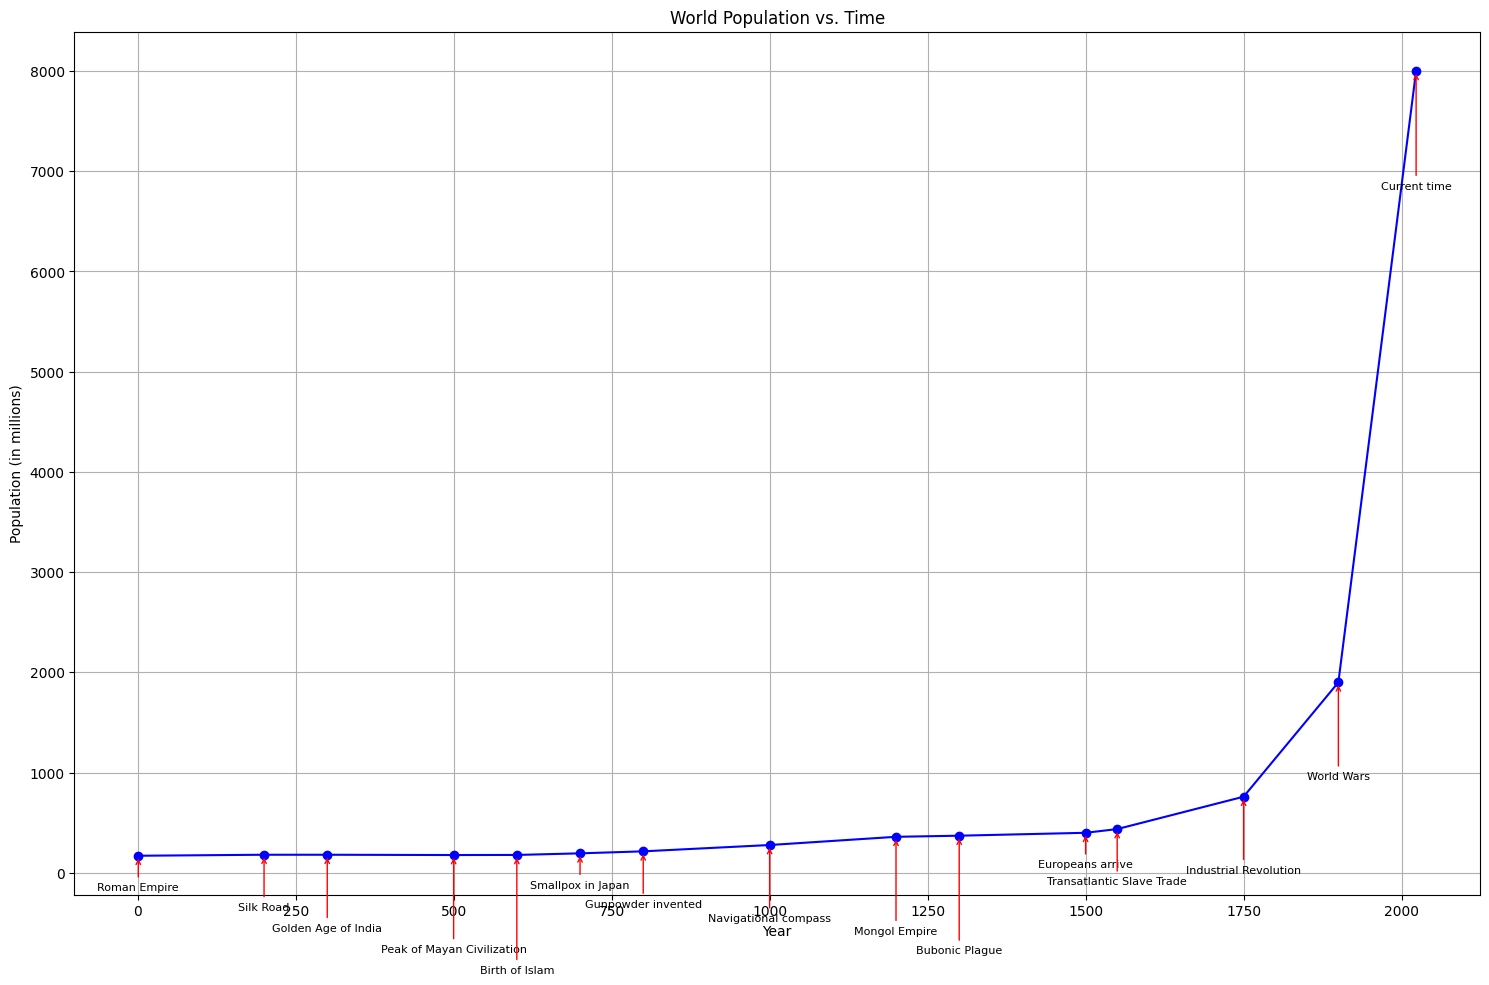

In [2]:
import matplotlib.pyplot as plt

# Extracting data from the provided list
events = [entry[0] for entry in population]
years = [entry[1] for entry in population]
populations_millions = [entry[2] for entry in population]

# Setting up the figure and axis
fig, ax = plt.subplots(figsize=(15, 10))
ax.plot(years, populations_millions, marker='o', color='b', linestyle='-')
ax.set_xlabel('Year')
ax.set_ylabel('Population (in millions)')
ax.set_title('World Population vs. Time')

# Annotating events below the years
for i, (year, event) in enumerate(zip(years, events)):
    # Calculating optimal y offset for text to avoid overlap
    y_offset = -25 - (i % 5) * 15
    ax.annotate(event, (year, populations_millions[i]), textcoords="offset points", xytext=(0,y_offset), ha='center', fontsize=8, arrowprops=dict(arrowstyle="->", color='red'))

# Displaying the graph
plt.grid(True, which='both')
plt.tight_layout()
plt.show()

You can get the plot straight from the video by summarizing it using
ChatGPT. The answer is in the [notebook](https://app.noteable.io/f/fddad336-cbab-4cc0-bd7b-4c5ae1e998d4/Human_Population_Growth.ipynb) and in the [transcript](https://chat.openai.com/share/f2f736bc-e04e-494e-9ff3-a9d38cb33799). For the video analysis, you need a ChatGPT subscription, and the VoxScript plugin. For the code analysis, you need the 'Advanced Code Analytics' mode for GPT-4.



## Gathering the data



The data come from "Estimates of historical world population"
([Wikipedia](https://en.wikipedia.org/wiki/Estimates_of_historical_world_population)). We'll scrape them using `pandas.read_html`.

Import the function `read_html` from `pandas`



In [5]:
from pandas import read_html

Check out the help for `read_html` - what is the default output?



In [6]:
read_html?

Signature:
read_html(
    io: 'FilePath | ReadBuffer[str]',
    *,
    match: 'str | Pattern' = '.+',
    flavor: 'str | None' = None,
    header: 'int | Sequence[int] | None' = None,
    index_col: 'int | Sequence[int] | None' = None,
    skiprows: 'int | Sequence[int] | slice | None' = None,
    attrs: 'dict[str, str] | None' = None,
    parse_dates: 'bool' = False,
    thousands: 'str | None' = ',',
    encoding: 'str | None' = None,
    decimal: 'str' = '.',
    converters: 'dict | None' = None,
    na_values: 'Iterable[object] | None' = None,
    keep_default_na: 'bool' = True,
    displayed_only: 'bool' = True,
    extract_links: "Literal[(None, 'header', 'footer', 'body', 'all')]" = None,
) -> 'list[DataFrame]'
Docstring:
Read HTML tables into a ``list`` of ``DataFrame`` objects.

Parameters
----------
io : str, path object, or file-like object
    String, path object (implementing ``os.PathLike[str]``), or file-like
    object implementing a string ``read()`` function.
    The 

The data are already available in the workspace for you. You can
download the raw HTML of any webpage with a right-click.

Store the `filename`, then read the file into a sequence `tables` of
`DataFrame` objects for each table contained in the web page:



In [11]:
filename = 'World_population_estimates.html'
tables = read_html(filename, header = 0, index_col=0, decimal='M')


## Exploring the data



Select a `DataFrame` from `tables` using the `[]` index operator. Select the
third table, which contains population estimates from 1950 to 2016
([source](https://en.wikipedia.org/wiki/Estimates_of_historical_world_population#1950_to_2016)):



In [12]:
table2 = tables[2]

Display the first few rows of the table:



In [15]:
print(table2.head()) 

      United States Census Bureau (2017)[28]  ...  Clark (1967)[23]
Year                                          ...                  
1950                              2557628654  ...      2.486000e+09
1951                              2594939877  ...               NaN
1952                              2636772306  ...               NaN
1953                              2682053389  ...               NaN
1954                              2730228104  ...               NaN

[5 rows x 11 columns]


The first column (`Year`) contains the `index` or labels for each
row. Notice the difference in notation and the missing data (`NaN`).



## Transforming the data



To reduce the length of the column labels in the header, overwrite the
`columns` list of names:



In [17]:
table2.columns = ['census', 'prb', 'un', 'maddison',
                    'hyde', 'tanton', 'biraben', 'mj',
                    'thomlinson', 'durand', 'clark']

print(table2.head(n=2))

          census           prb            un  ...    thomlinson  durand         clark
Year                                          ...                                    
1950  2557628654  2.516000e+09  2.525149e+09  ...  2.400000e+09     NaN  2.486000e+09
1951  2594939877           NaN  2.572851e+09  ...           NaN     NaN           NaN

[2 rows x 11 columns]


The `DataFrame` is an object just like the `State` object in our last
simulation. To select a column from a `DataFrame`, use the dot
operator:



In [18]:
census = table2.census / 1e9

In [19]:
print(census)

Year
1950    2.557629
1951    2.594940
1952    2.636772
1953    2.682053
1954    2.730228
          ...   
2012    7.013871
2013    7.092128
2014    7.169968
2015    7.247893
2016    7.325997
Name: census, Length: 67, dtype: float64


Here, we have divided all elements of `census` by $1\times 10^9$ to
reduce the printed number size. This is called *vectorization* and it
only works in Python with `numpy` or `pandas`:



In [26]:
# vectorization is not a thing for regular Python lists
foo = [100000, 200000, 300000]
# print(foo/1e5) # TypeError - no / for lists
#foo/1e5
# try this with numpy
import numpy as np
foonp = np.array(foo)
print(foonp)
print(type(foonp))
print(foonp/1e5)
# try this with pandas
import pandas as pd
foose = pd.Series(foo)
print(foose)
print(type(foose))
print(foose/1e5)

[100000 200000 300000]
<class 'numpy.ndarray'>
[1. 2. 3.]
0    100000
1    200000
2    300000
dtype: int64
<class 'pandas.core.series.Series'>
0    1.0
1    2.0
2    3.0
dtype: float64


Verify that `census` is the same `type` of object as the `TimeSeries` and
`SweepSeries` objects that we've been working with:



In [27]:
type(census)

pandas.core.series.Series

Import `show` from `modsim` and display `census` in billions [bn]. This will
show both the `head` and the `tail` of the labeled column vector.



In [29]:
from modsim import show
print(show(census))

        census
Year          
1950  2.557629
1951  2.594940
1952  2.636772
1953  2.682053
1954  2.730228
...        ...
2012  7.013871
2013  7.092128
2014  7.169968
2015  7.247893
2016  7.325997

[67 rows x 1 columns]


The first column of the printed table is the `index`, the second are the
`values`. You can print them independently (as a list comprehension):



In [33]:
[print(_) for _  in census.index[0:5]];
[print(_) for _  in census.values[0:5]];

1950
1951
1952
1953
1954
2.557628654
2.594939877
2.636772306
2.682053389
2.730228104


## Extracting data



What if you want to find the world population for a particular year,
e.g. 2016? This is easy since the `Series` elements are labelled:



In [34]:
census[2016]

7.325996709

What about the year in which the population passed a certain
threshold, say when it got over 5 bn?

You can build a logical flag vector trained on a condition:



In [37]:
census_5 = census.values > 5
census_5

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

When you use `census_5` as index vector, only the elements for which the
condition was `True` are printed:



In [40]:
census[census_5].head()

Year
1987    5.027200
1988    5.114557
1989    5.201440
1990    5.288956
1991    5.371586
Name: census, dtype: float64

The first of these is the value we sought, for which the population
went over 5 bn for the first time:



In [42]:
census[census_5].index[0]

1987

It's worth dwelling on this expression a little:

1.  select `census` vector.
2.  Select index values of `census` for which `census` exceeded a `value`.
3.  Extract elements of `census` for these index values.
4.  Select the `value` that belongs to the first `index` (labeled `0`).

Can you put this process into a function that accepts as argument the
number of billions and returns the year? Test it for `values` 5,6,7 billions.



In [46]:
def year(value):
    threshold = census > value
    return census[threshold].index[0]

print(year(7))
    

2012


## Plotting the data



Check the estimates from the UN, which are stored in the column `un`:

1.  Save the column in a `Series` `un` (normalized to billions).
2.  Display the end of the column with `show` and `tail`:



Estimates from the UN after 2015 are missing. We can plot both the US
and the UN estimates with the `Series.plot` function. We first plot each
curve on its own, and then we'll put them in a function to plot them
side by side.

Plot the US `census` data:



Plot the UN DESA data in `un`:



Create a function to plot US `census` and UN DESA `un` data:



Plot all the data with a title:



## Absolute and relative errors



As the plot showed, the estimates from the US and the UN differ
slightly. We can express the difference as *error*:

1.  The *absolute error* is the absolute value of the difference between
    the estimates.
2.  The *relative error* is obtained by normalizing the error using the
    size of the estimates.
3.  When we compute an error, absolute or relative, for every two
    estimates of two `Series`, we're interested in statistical
    properties, too, e.g. the average and the maximum.

To compute absolute errors, `import` the function `abs` from `numpy`.



Compute the difference of the errors across both `Series`, take the
absolute with `abs` and display the `tail` end of the resulting `Series`:



In [4]:
# compute difference of un and census errors

# take the absolute error and call it abs_error

# display the tail of the result


Notice how we're getting `NaN` in the last row because the computer
cannot guess the value of a missing number.

Compute the `mean` absolute error after getting the function `mean` from
`numpy`.



On average the estimates differ by 0.029 bn (29 mio) people.



Compute the *maximum absolute error* with the `numpy` function `max`.



The estimates differ at worst by 0.1 bn (100 mio) people. How much is
that relative to the total numbers?

To compute *relative error* (relative to the estimates), we divide the
absolute error by the estimates (and multiply by 100 for percent):



In 2015, the difference is about 1.4%. This is also the maximum:



The average relative error summarizes these results:



A mean relative error of 0.6% is not bad (what does it depend on how
bad it really is? Why do we compute errors?)

You could have computed the relative error by dividing by the UN
estimates, too. In general, use the better estimator if there's
one. If you don't know which one's better, take the larger one
(`census`) so that the computed errors are more conservative (larger).



Next, we're going to create a model from these data and simulate it to see the population growth in the future.